In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
data=pd.read_csv('brain_stroke.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# CHECKING AND REMOVAL OF MISSING DATA

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
data['age'].unique()


array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [ ]:
categorical = []
numerical = []
for i in data:
  if data.dtypes[i]=='object':
    categorical.append(i)
  else:
    numerical.append(i)
print(categorical)
print(numerical)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


<Axes: ylabel='avg_glucose_level'>

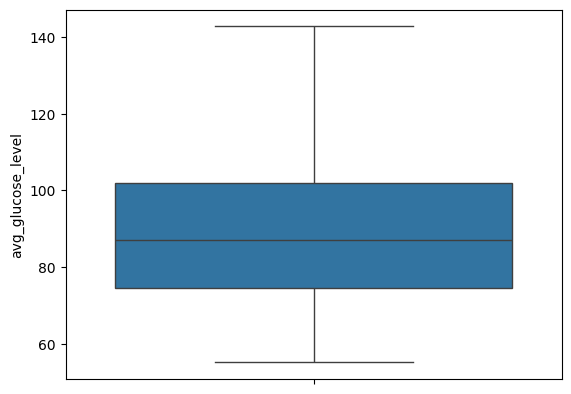

In [ ]:
sns.boxplot(data['avg_glucose_level'])

<Axes: ylabel='bmi'>

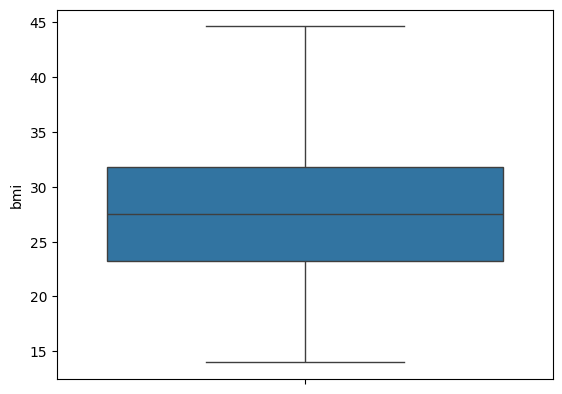

In [ ]:
sns.boxplot(data['bmi'])

In [ ]:
q1=data['avg_glucose_level'].quantile(0.25)
q3=data['avg_glucose_level'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
data=data[(data['avg_glucose_level']<upper_limit) & (data['avg_glucose_level']>lower_limit)]

In [ ]:
q1=data['bmi'].quantile(0.25)
q3=data['bmi'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
data=data[(data['bmi']<upper_limit) & (data['bmi']>lower_limit)]

In [ ]:
data = data[data['age']>0]
data = data[data['bmi']>0]
data = data[data['avg_glucose_level']<250]
data = data[data['avg_glucose_level']>0]
data = data.loc[data["gender"] != 'Other']
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


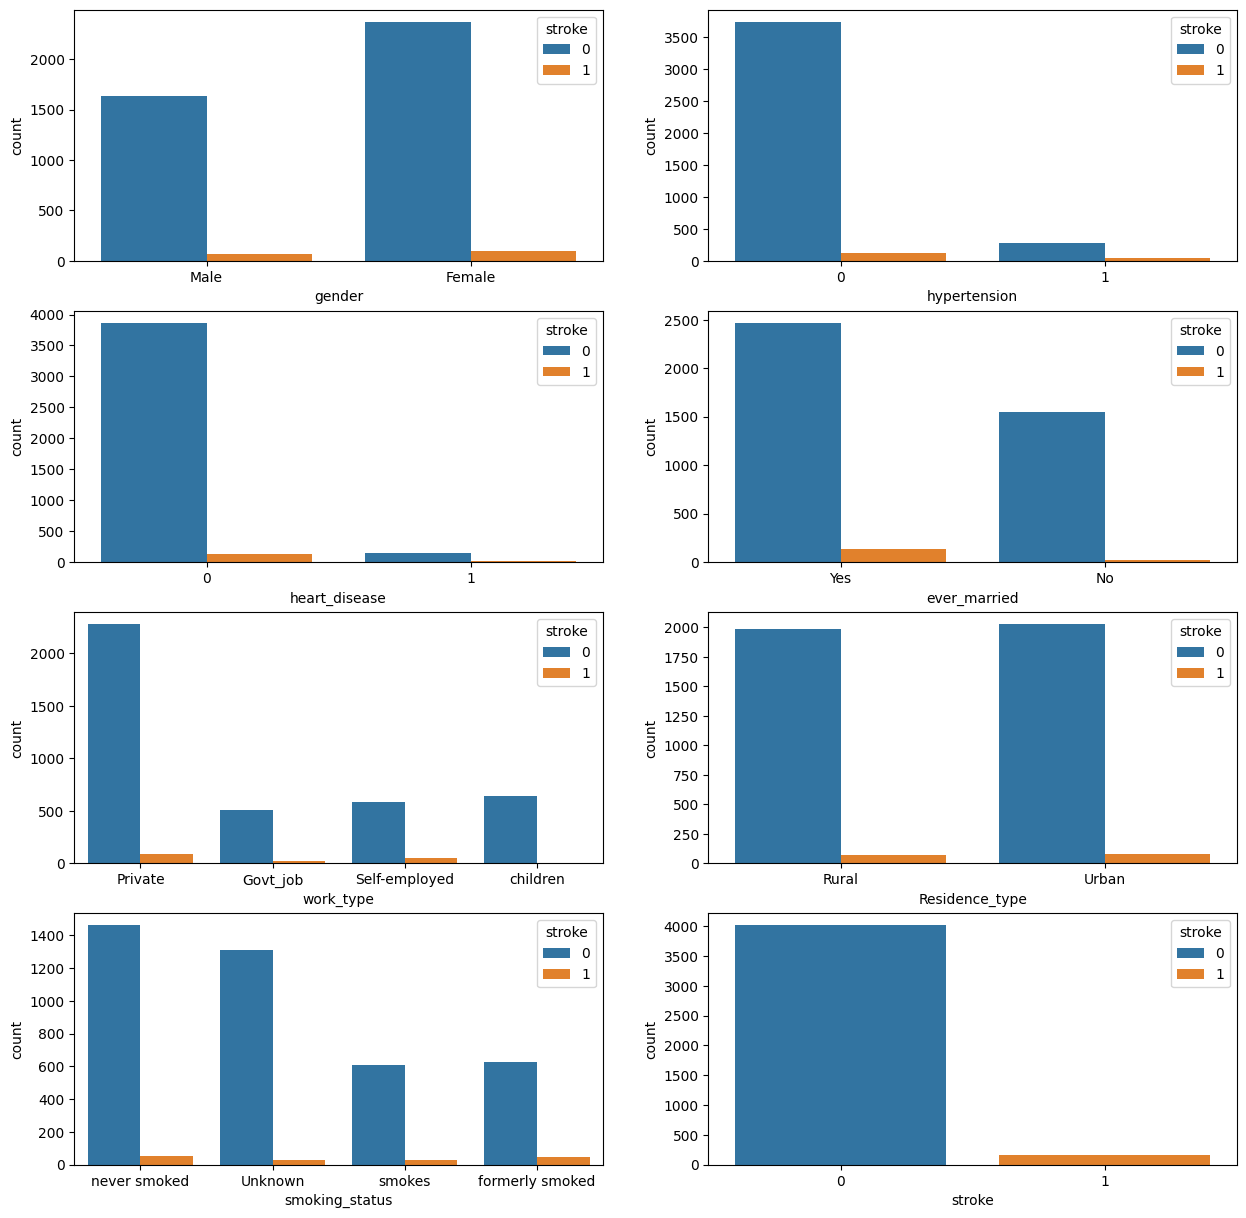

In [ ]:
d_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
for i, col_name in enumerate(d_st):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'])

plt.savefig('countplot.png')

In [ ]:
 data[numerical].corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.253038,0.239937,-0.041683,0.389058,0.226919
hypertension,0.253038,1.000000,0.088447,-0.009509,0.161538,0.118235
heart_disease,0.239937,0.088447,1.000000,-0.000494,0.059523,0.089609
avg_glucose_level,-0.041683,-0.009509,-0.000494,1.000000,-0.000484,-0.005516
bmi,0.389058,0.161538,0.059523,-0.000484,1.000000,0.029268
stroke,0.226919,0.118235,0.089609,-0.005516,0.029268,1.000000


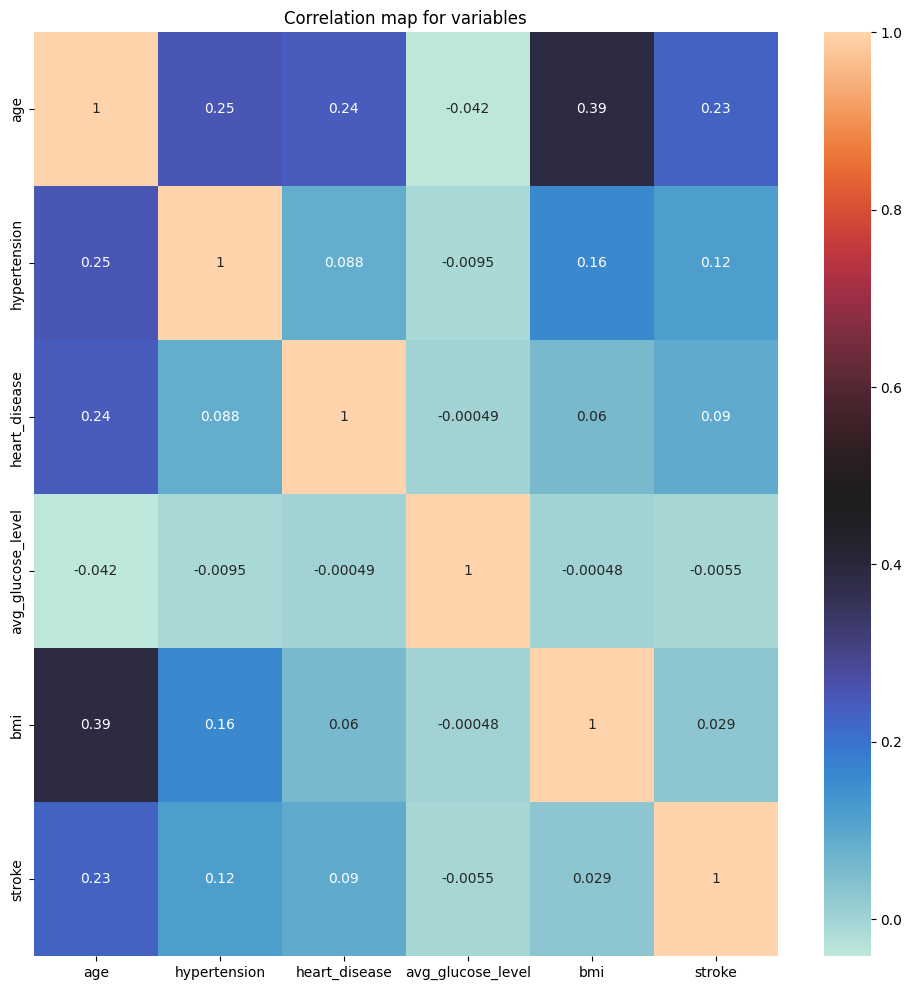

In [ ]:
#correlation map for features

f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(data[numerical].corr(), annot=True,ax=ax,cmap="icefire")
plt.savefig('stroke_correlation heatmap.png')


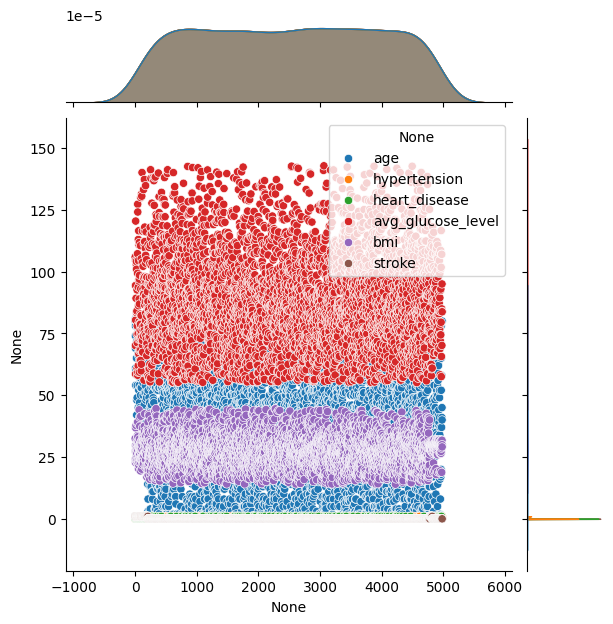

In [ ]:
sns.jointplot(data)

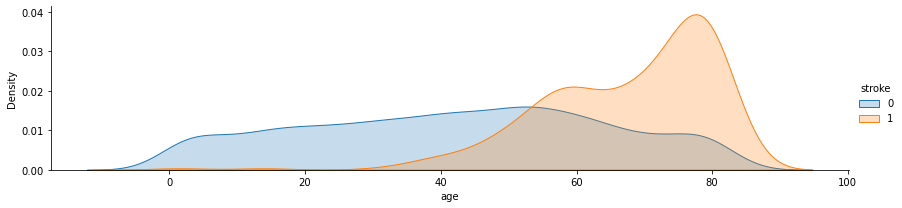

In [ ]:
#### AGE ###

fig = sns.FacetGrid(data=data, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()
plt.savefig('stroke age.png')

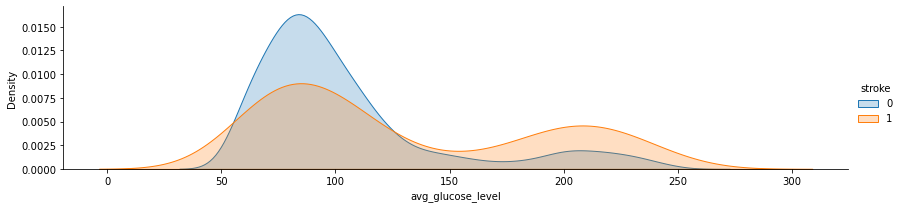

In [ ]:
#### Glucose ####

fig = sns.FacetGrid(data=data, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "avg_glucose_level", shade=True)
fig.add_legend()
plt.savefig('glucose 1 kdeplot.png')

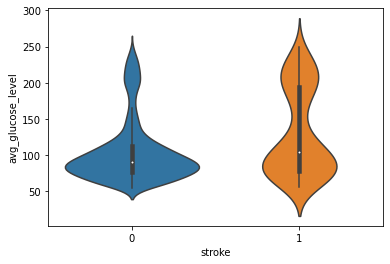

In [ ]:
sns.violinplot(x="stroke", y="avg_glucose_level", data=data)
plt.savefig('stroke_glucose.png')
plt.savefig('glucose 2 kdeplot.png')

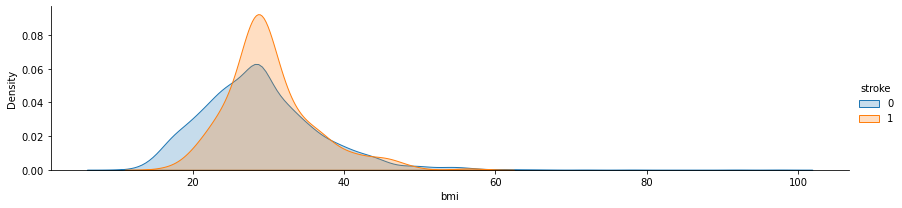

In [ ]:
fig = sns.FacetGrid(data=data, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()
plt.savefig('bmi kdeplot.png')

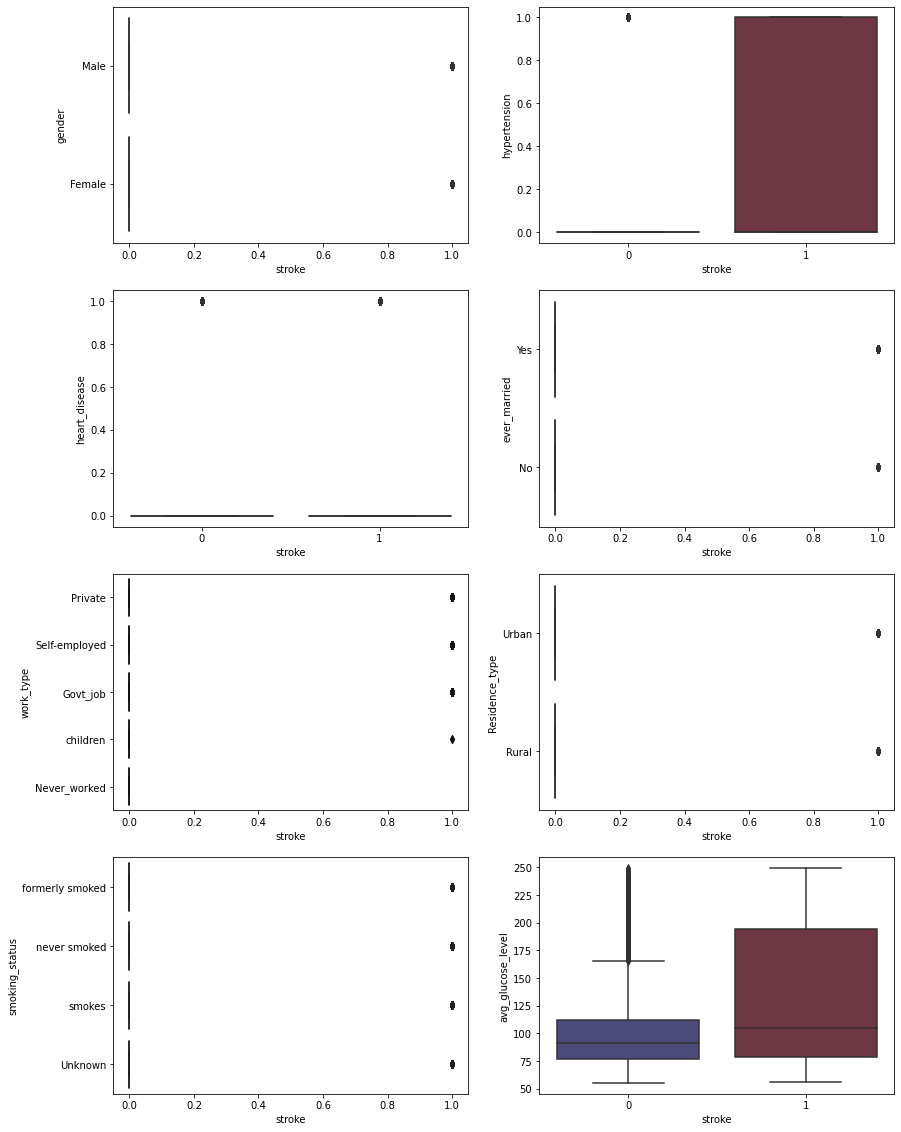

In [ ]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','avg_glucose_level']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.boxplot(data=data,x=data['stroke'],ax=axs[i],y=col_name,palette='icefire')

plt.savefig('stroke_chart.png')

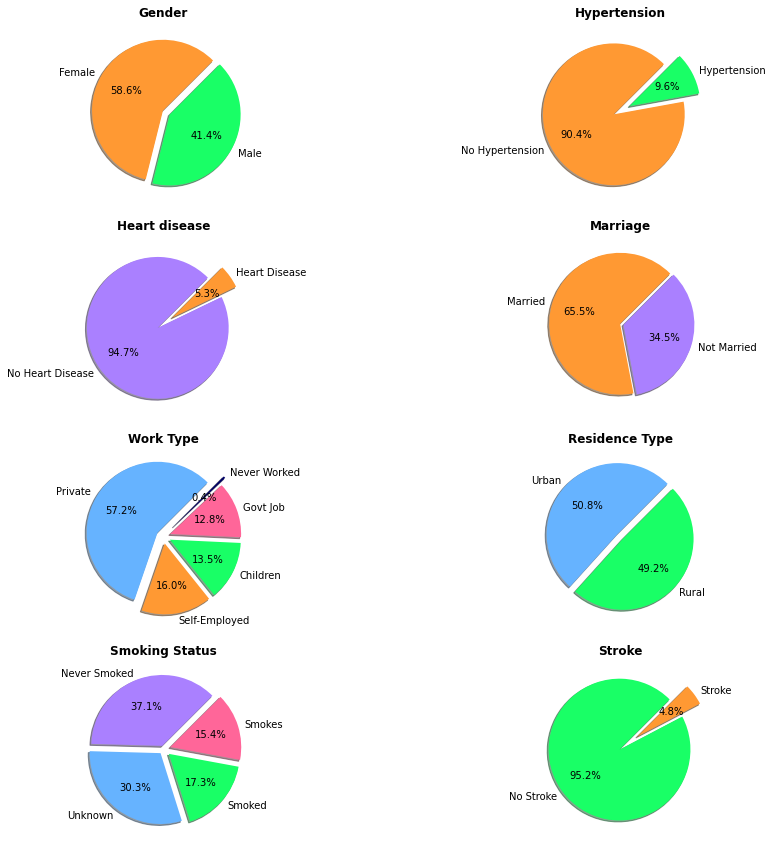

<Figure size 432x288 with 0 Axes>

In [ ]:


fig, ax = plt.subplots(4,2, figsize = (15,15))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Female","Male"]
values = data['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = data['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = data['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = data['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = data['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = data['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = data['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = data['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.show()
plt.savefig('piecharts.png')

In [ ]:
# LABEL THE DATA

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(data['gender'])
ever_married=enc.fit_transform(data['ever_married'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
smoking_status=enc.fit_transform(data['smoking_status'])


data['gender']=gender
data['ever_married']=ever_married
data['work_type']=work_type
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status

In [ ]:
X=data.drop('stroke',axis=1)
#X=data[cols]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
Y=data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5084, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xms=scaler.fit_transform(X)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()
#xstd=std.fit_transform(X)

# It is used to standardizes features by removing the mean and scaling to unit variance from the Data

In [ ]:
smote = SMOTE()
X_over,Y_over=smote.fit_resample(Xms,Y)

In [ ]:
# SPLITTING OF DATA

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_over,Y_over,test_size = 0.3, random_state = 42)



In [ ]:
#  LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=lr.predict(X_test)

# Prediction on testing data

In [ ]:
accu_lr =accuracy_score(Y_test,Y_pred)
prec_lr = precision_score(Y_test,Y_pred)
f1_lr = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  75.93068035943517
Accuracy -->  77.89256198347107
F1 Score -->  77.86307979979402

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1454
           1       0.76      0.82      0.79      1450

    accuracy                           0.78      2904
   macro avg       0.78      0.78      0.78      2904
weighted avg       0.78      0.78      0.78      2904



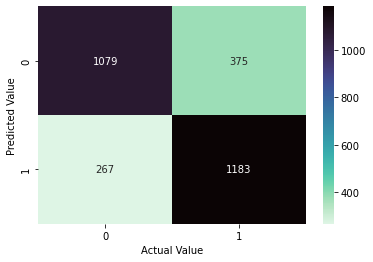

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig('lr confusion matrix.png')


In [ ]:
#  RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test)
# Prediction on testing data

In [ ]:
accu_rf =accuracy_score(Y_test,Y_pred)
prec_rf = precision_score(Y_test,Y_pred)
f1_rf = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  94.16157501697217
Accuracy -->  94.86914600550963
F1 Score -->  94.86888011890355

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1454
           1       0.94      0.96      0.95      1450

    accuracy                           0.95      2904
   macro avg       0.95      0.95      0.95      2904
weighted avg       0.95      0.95      0.95      2904



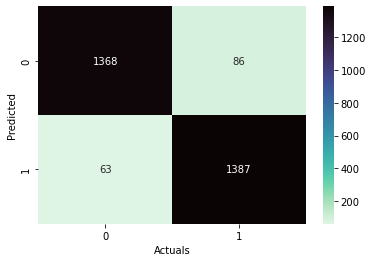

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('rf confusion matrix.png')


In [ ]:
# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred=dt.predict(X_test)

# Prediction on testing data

In [ ]:
accu_dt =accuracy_score(Y_test,Y_pred)
prec_dt = precision_score(Y_test,Y_pred)
f1_dt = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  89.26128590971271
Accuracy -->  89.60055096418733
F1 Score -->  89.6004325805619

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1454
           1       0.89      0.90      0.90      1450

    accuracy                           0.90      2904
   macro avg       0.90      0.90      0.90      2904
weighted avg       0.90      0.90      0.90      2904



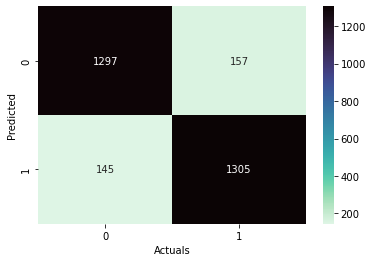

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('dt confusion matrix.png')


In [ ]:
# K-Nearest Neighbor [ KNN ]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(X_test)

# Prediction on testing data

In [ ]:
accu_knn =accuracy_score(Y_test,Y_pred)
prec_knn = precision_score(Y_test,Y_pred)
f1_knn = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  83.84615384615385
Accuracy -->  89.46280991735537
F1 Score -->  89.39156849432315

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.97      0.81      0.89      1454
           1       0.84      0.98      0.90      1450

    accuracy                           0.89      2904
   macro avg       0.91      0.89      0.89      2904
weighted avg       0.91      0.89      0.89      2904



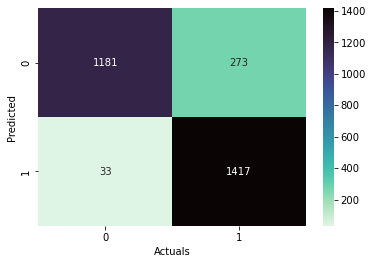

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('knn confusion matrix.png')


In [ ]:
# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred=nb.predict(X_test)

# Prediction on testing data

In [ ]:
accu_nb =accuracy_score(Y_test,Y_pred)
prec_nb = precision_score(Y_test,Y_pred)
f1_nb = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  74.2462311557789
Accuracy -->  76.65289256198346
F1 Score -->  76.598518831882

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.80      0.72      0.75      1454
           1       0.74      0.82      0.78      1450

    accuracy                           0.77      2904
   macro avg       0.77      0.77      0.77      2904
weighted avg       0.77      0.77      0.77      2904



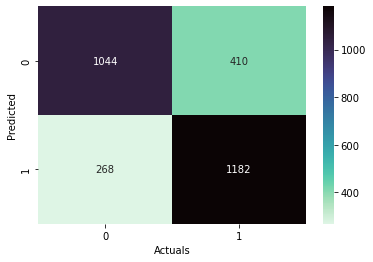

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('nb confusion matrix.png')


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)



/home/ankur/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
accu_xgb =accuracy_score(Y_test,Y_pred)
prec_xgb = precision_score(Y_test,Y_pred)
f1_xgb = f1_score(Y_test,Y_pred)
print('Precision --> ',precision_score(Y_test,Y_pred)*100)
print('Accuracy --> ',accuracy_score(Y_test,Y_pred)*100)
print('F1 Score --> ',f1_score(Y_test,Y_pred,average='weighted',zero_division=1)*100)
print('\nClassification Report  --> \n',classification_report(Y_test,Y_pred,zero_division=1,digits=2))

Precision -->  97.19626168224299
Accuracy -->  95.28236914600551
F1 Score -->  95.28028883754092

Classification Report  --> 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1454
           1       0.97      0.93      0.95      1450

    accuracy                           0.95      2904
   macro avg       0.95      0.95      0.95      2904
weighted avg       0.95      0.95      0.95      2904



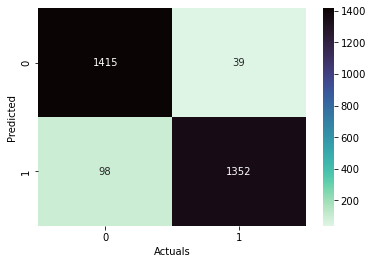

In [ ]:
cm=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='mako_r',fmt="2")
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('xgb confusion matrix.png')


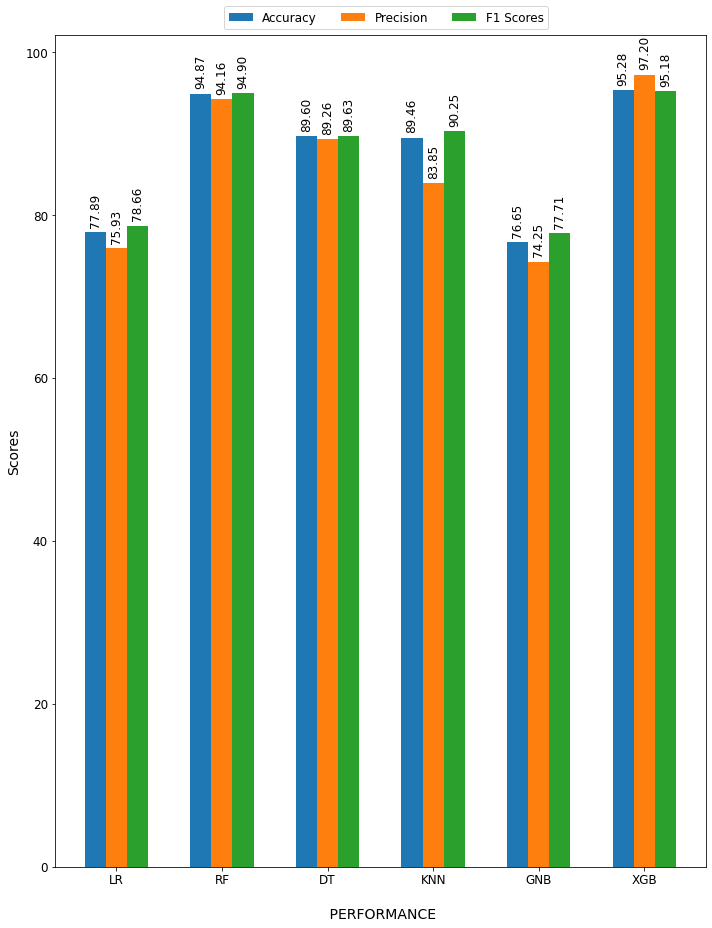

In [ ]:
ml_names = ['LR','RF','DT','KNN', 'GNB', 'XGB']
prec_all = [prec_lr*100, prec_rf*100, prec_dt*100, prec_knn*100, prec_nb*100,prec_xgb*100]
accu_all = [accu_lr*100, accu_rf*100, accu_dt*100, accu_knn*100, accu_nb*100,accu_xgb*100]
f1_all = [f1_lr*100, f1_rf*100, f1_dt*100, f1_knn*100, f1_nb*100,f1_xgb*100]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.2  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig, ax = plt.subplots(figsize=(10,13))
bar1 = ax.bar(r1, accu_all, width, label='Accuracy')
bar2 = ax.bar(r2, prec_all, width, label='Precision')
bar3 = ax.bar(r3, f1_all, width, label='F1 Scores')

ax.set_ylabel('Scores',fontsize=14)

ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("\n PERFORMANCE",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml performance.png", bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

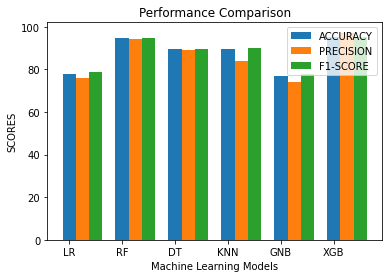

In [ ]:
ml_names = ['LR','RF','DT','KNN', 'GNB', 'XGB'] #x axis
width=0.5

ind=np.arange(len(ml_names))

prec_all = [prec_lr*100, prec_rf*100, prec_dt*100, prec_knn*100, prec_nb*100,prec_xgb*100]
accu_all = [accu_lr*100, accu_rf*100, accu_dt*100, accu_knn*100, accu_nb*100,accu_xgb*100]
f1_all = [f1_lr*100, f1_rf*100, f1_dt*100, f1_knn*100, f1_nb*100,f1_xgb*100]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')


X_axis=np.arange(len(ml_names))

plt.bar(X_axis+0 ,accu_all,0.25,label='ACCURACY')
plt.bar(X_axis+0.25 ,prec_all,0.25,label='PRECISION')
plt.bar(X_axis+0.5 ,f1_all,0.25,label='F1-SCORE')

plt.xticks(X_axis,ml_names)
plt.xlabel("Machine Learning Models")
plt.ylabel("SCORES")
plt.title("Performance Comparison")
plt.legend()
plt.show